In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
def plot_images(imgs):
    
    for tag, img in imgs.items():
        plot_image(img, tag)

In [22]:
def plot_image(img, tag=None):
    print('Dimensions : ',img.shape)

    d = np.ones((img.shape[0], img.shape[1], 4), dtype=np.uint8)*0
    d[:, :, 3] = 255

    plt.title(tag)
    plt.imshow(d)
    plt.imshow(img, alpha=1)

    plt.show()

In [47]:
def save_image(img, path):
    cv2.imwrite('./output/' + path + '.png', img)

In [31]:
def read_image(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return img

Dimensions :  (10, 10, 4)


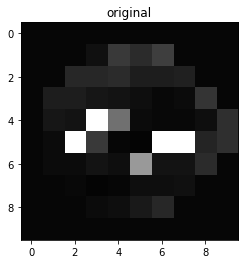

Dimensions :  (1600, 1440, 4)


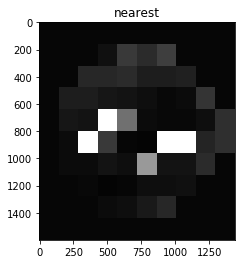

Dimensions :  (1600, 1440, 4)


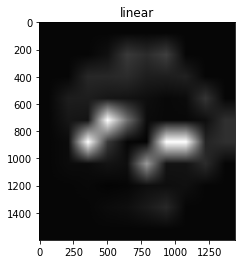

Dimensions :  (1600, 1440, 4)


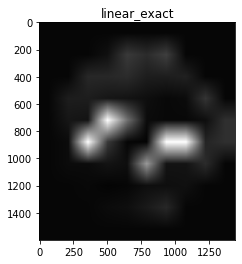

Dimensions :  (1600, 1440, 4)


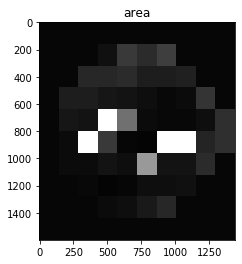

Dimensions :  (1600, 1440, 4)


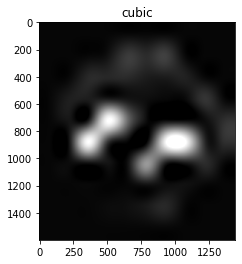

Dimensions :  (1600, 1440, 4)


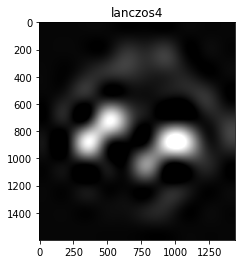

Dimensions :  (1600, 1440, 4)


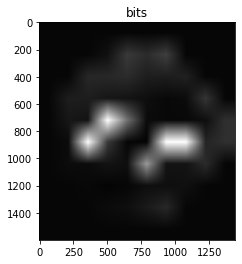

Dimensions :  (1600, 1440, 4)


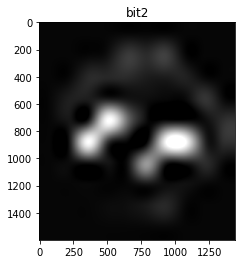

TypeError: save_image() missing 1 required positional argument: 'path'

In [133]:
imgs = {
    "original": img,
    "nearest": cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST),
    "linear": cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR),
    "linear_exact": cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR_EXACT),
    "area": cv2.resize(img, dim, interpolation = cv2.INTER_AREA),
    "cubic": cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC),
    "lanczos4": cv2.resize(img, dim, interpolation = cv2.INTER_LANCZOS4),
    "bits": cv2.resize(img, dim, interpolation = cv2.INTER_BITS),
    "bit2": cv2.resize(img, dim, interpolation = cv2.INTER_BITS2),
}

plot_images(imgs)
save_image(imgs['cubic'])

In [137]:
def upscale(path, dim, method, plot, save):
    img = read_image(path)
    scaled_img = cv2.resize(img, (max(dim), max(dim)), interpolation = method)
    if dim[0] is not dim[1]: scaled_img = scaled_img[:, (max(dim) - min(dim))//2 : ((max(dim)-min(dim))//2) + min(dim)]
    if plot: plot_image(scaled_img)
    if save: save_image(scaled_img, path.split('/', 1)[1].split('.png',1)[0])

In [143]:
def run():
    for img_path in img_paths:
        dim = (1440, 1600) if 'context' in img_path else (8192, 8192)
        upscale(img_path, dim, method, plot, save)

# Run

Dimensions :  (1600, 1440, 4)


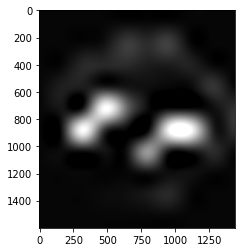

Dimensions :  (8192, 8192, 4)


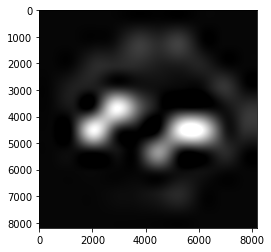

Dimensions :  (1600, 1440, 4)


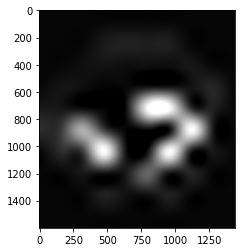

Dimensions :  (8192, 8192, 4)


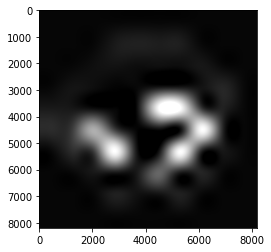

In [144]:
img_paths = [
    '../patient1_2013_left_added_first_last.txt_context.png',
    '../patient1_2013_left_added_first_last.txt_focus.png',
    '../patient1_2013_right_added_first_last.txt_context.png',
    '../patient1_2013_right_added_first_last.txt_focus.png'
]

method = cv2.INTER_CUBIC
plot = True
save = True

run()